# __D208 PA Task 2:__ *Multiple Logistic Regression*
>### Aaminah Halipoto
>### Western Governor's University


### Table of Contents
>A1. [Research Question](#researchquestion) </br>
A2. [Goals](#goals)</br>
B1. [Summary of Assumptions](#summaryassumption)</br>
B2. [Tools Benefits](#toolsbenefits)</br>
B3. [Appropriate Technique](#appropriatetechnique)</br>
C1. [Data cleaning](#datacleaning)</br>
C2. [Summary statistics](#summarystatistics)</br>
C3. [Visualizations](#visualizations)</br>
C4. [Data transformation](#datatransformation)</br>
C5. [Prepared data set](#prepareddataset)</br>
C5.1 [Primary component analysis](#pcadata)</br>
D1. [Initial model](#initialmodel)</br>
D2. [Justification of model reduction](#justification)</br>
D2.1 [Variance inflation factor](#vif)</br> 
D3. [Reduced logistic regression model](#reducedmodel)</br>
E1. [Model comparison](#modelcomparison)</br>
E2. [Output and calculations](#output)</br>
E3. [Code](#endcode)</br>
F1. [Results](#results)</br>
F2. [Recommendations](#recommendations)</br>
G. [Panopto Demonstration](#panoptolink)</br>
H. [Sources of Third-Party Code](#codesources)</br>
I. [Web Sources](#sources)</br>

#### __A1. Research Question__ <a name="researchquestion"></a>
What factors influence whether a customer churns, represented by the categorical ordinal variable ‘Churn’?


#### __A2. Goals__ <a name="goals"></a>
The goal of my analysis is to find the features within the Churn dataset that distinctly correlate to a customer's churn status.


#### __B1. Summary of Assumptions__ <a name="summaryassumption"></a>
We assume four properties of the model to proceed with logistic regression (Kumar, 2023). </br>
>1. The relationship between the log-odds of the dependent variable and the independent variables is linear. </br>
>2. The data is not multicollinear, and the variables within the dataset occur independently of each other. </br>
>3. The observations occur independently of each other.</br>
>4. The response variable is either a binary or ordinal categorical variable.


#### __B2. Tools Benefits__ <a name="toolsbenefits"></a>
I used Python for its adroitness in processing large volumes of data, as well as the feasibility of its many data analysis-oriented libraries (R or Python.). __Pandas__ is the most frequently used library for its capabilities in manipulating dataframes and creating visualizations. __Seaborn__ is another useful library for creating detailed visualizations such as the boxplot, which is an essential tool for visualizing outliers. I used the __SciPy stats package__ for basic statistical calculations, along with __NumPy__ for basic algebra. __Sklearn__ contains functions for running primary component analyses. The __Statsmodels__ package contains the useful APIs for creating logistic regression models and providing summary info on model structures, as well as variance inflation factor processing.


#### __B3. Appropriate Technique__ <a name="appropriatetechnique"></a>
Multiple logistic regression (MLR) is the correct way to assess my research question because I am looking to compare many explanatory variables to a singular, binary categorical response variable. Because the response variable is qualitative and predictions represent probabilities of occurrence, it is no longer possible to represent predictions with a linear function -- we must use an exponential function to accurately represent possibilities between 0% and 100%. Multiple logistic regression allows me to assess how multiple variables (whether quantitative or otherwise) affect the response variable at the same time; comparing many variables, rather than a single variable as in normal logistic regression, allows us to create more educated predictions, and thus more robust recommendations to stakeholders.

#### __C1. Data cleaning__ <a name="datacleaning"></a>
My goals in data cleaning are to clear the dataset of any duplicate records or null values. I must also deal appropriately with outliers, as they heavily influence the fit of the model I aim to create. Despite how sensitive models are to outliers, I also proceed with the understanding that I will likely retain most outliers in the dataframe, given that many are likely true values representing the sample at hand.

The following cells below illustrate the cleaning process.

In [11]:
#import necessary functions
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import metrics

#setting "clean" data as a dataframe
df = pd.read_csv('C://Users/Aaminah/Desktop/masters/D208/churn_clean.csv')

#allowing our dictionaries to cast between datatypes
pd.set_option('future.no_silent_downcasting', True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [12]:
#rectifying mistaken null value
df.fillna({'InternetService': "None"}, inplace = True)

In [13]:
#checking for duplicates. None are found, continue
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [14]:
#checking for nulls. None are found, continue
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

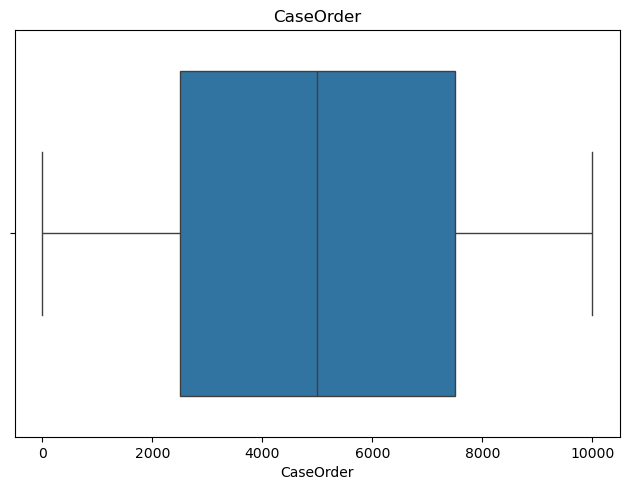

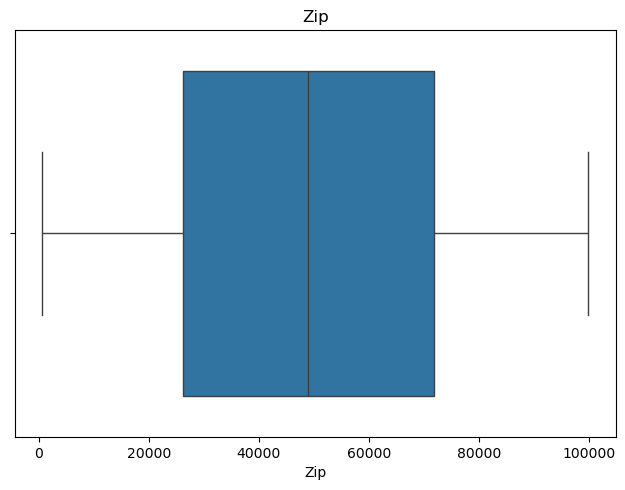

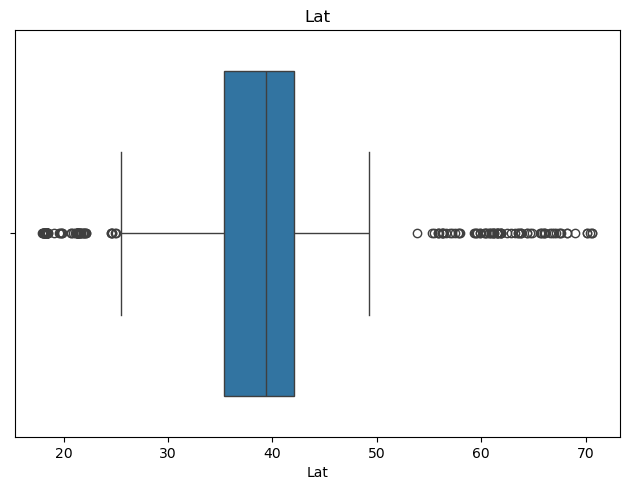

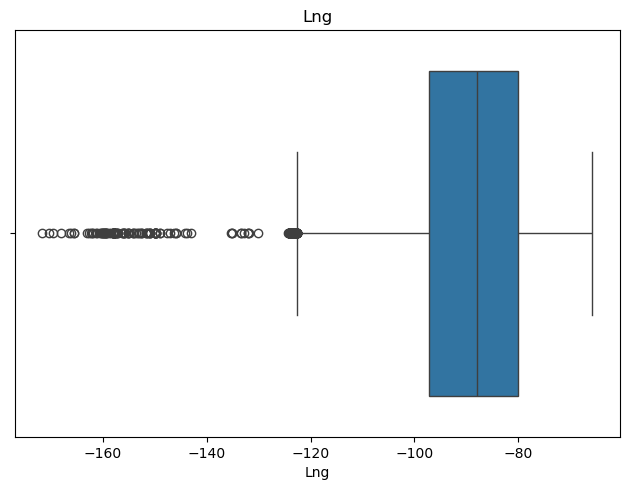

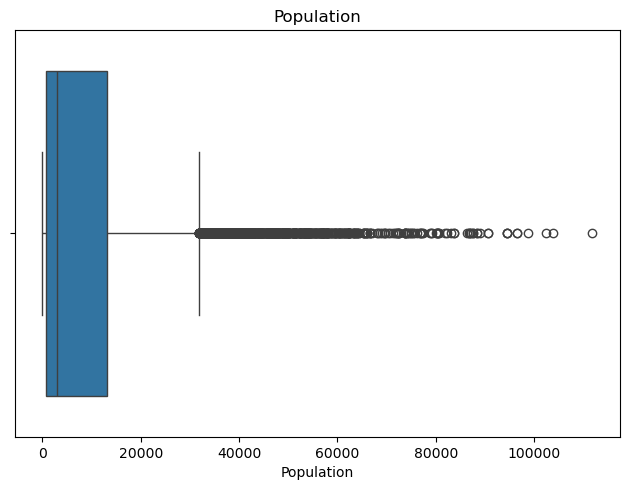

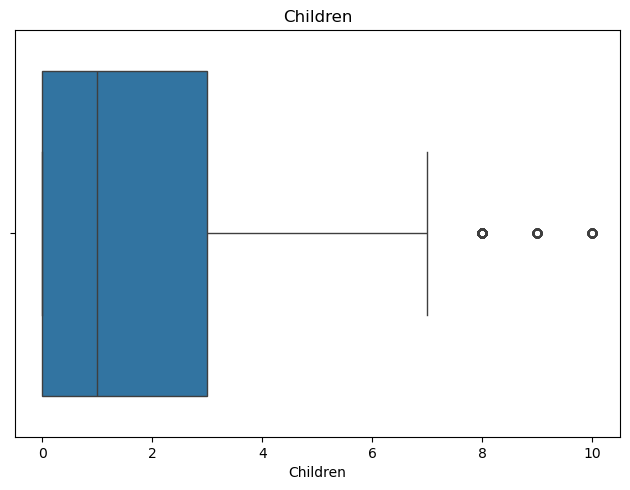

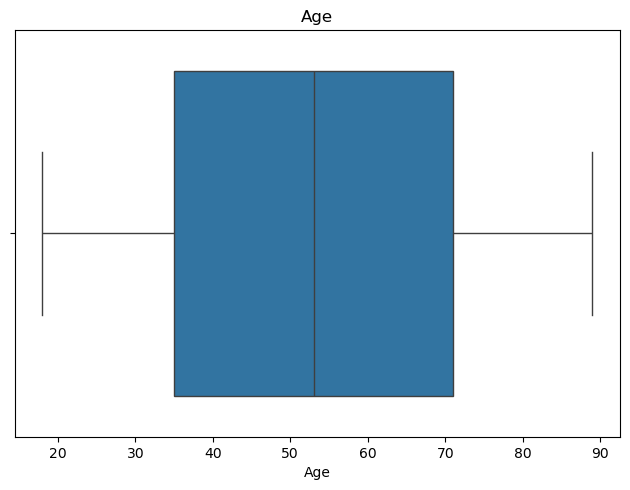

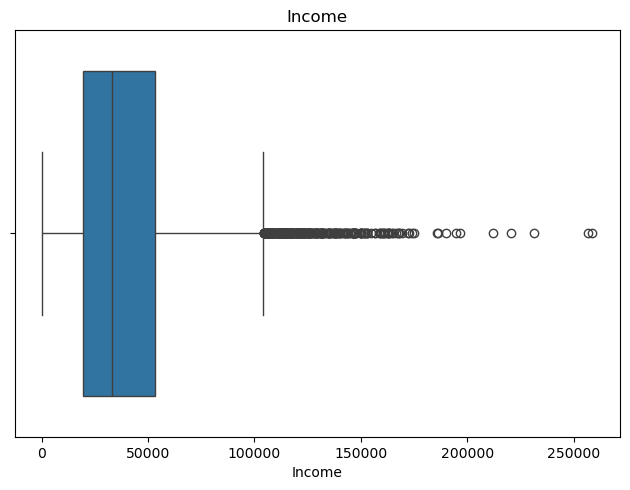

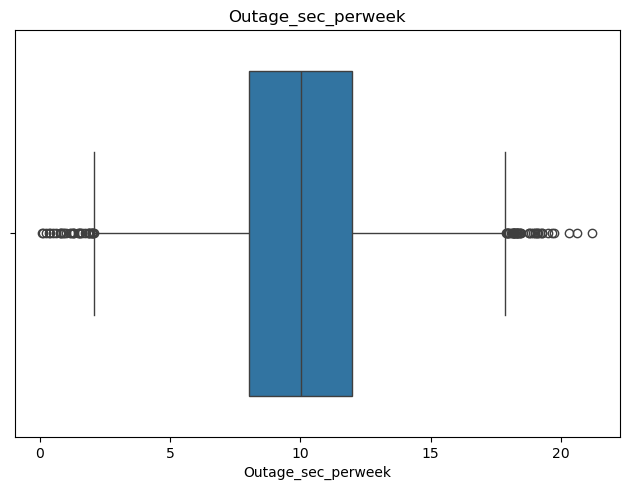

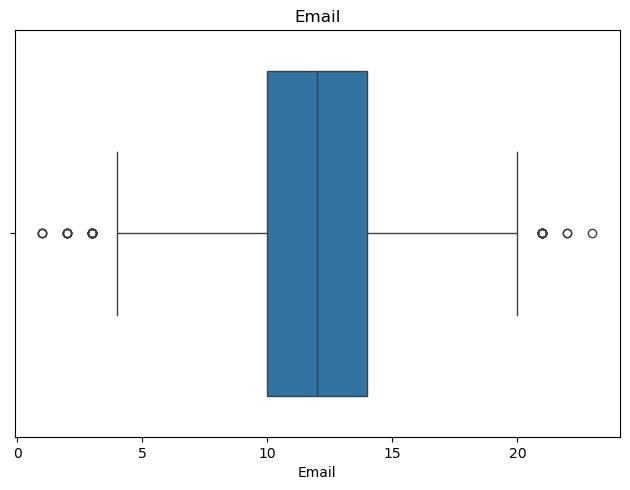

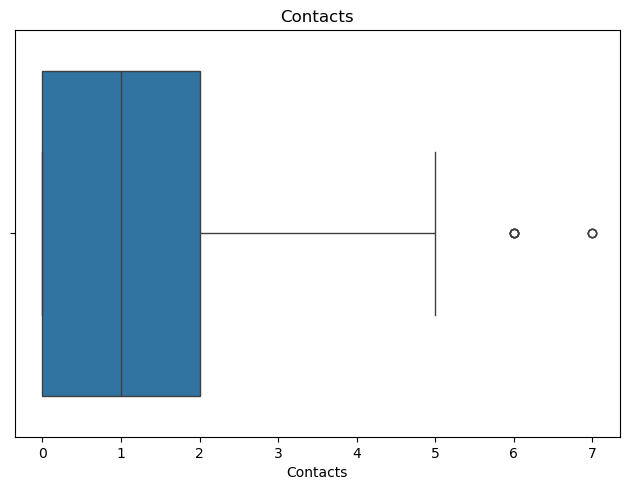

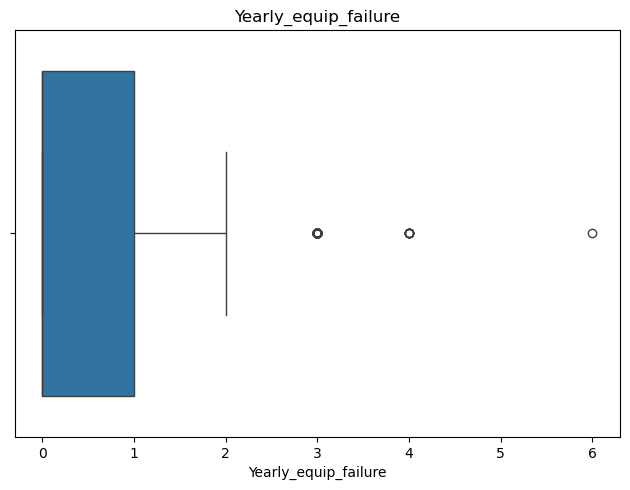

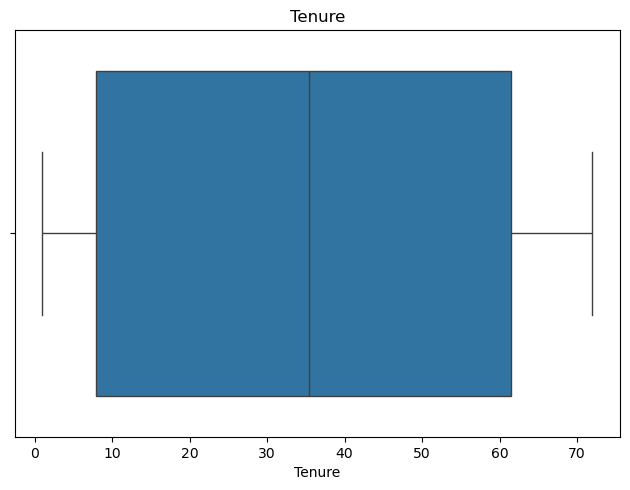

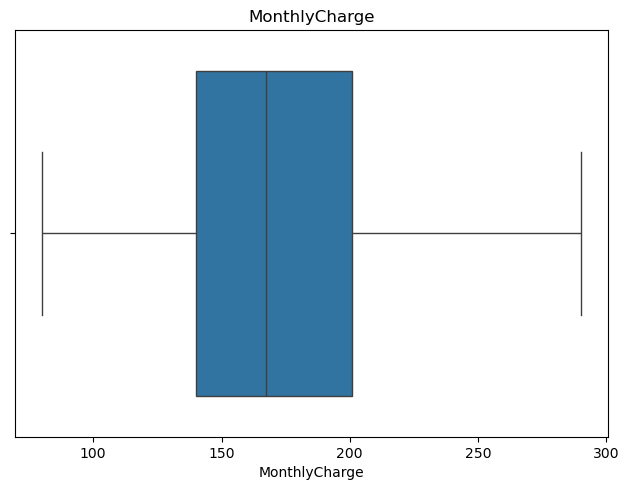

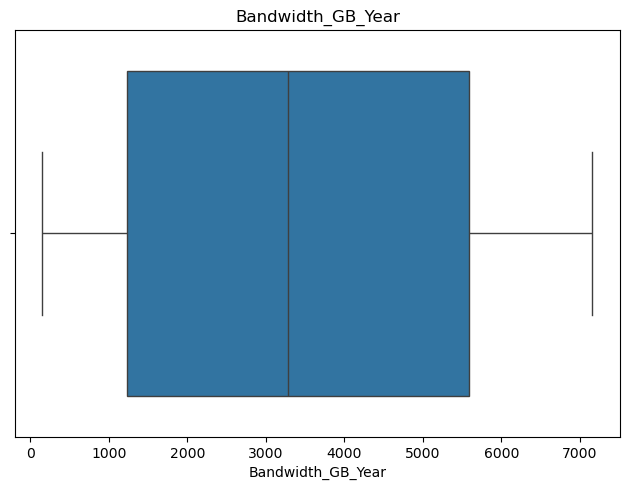

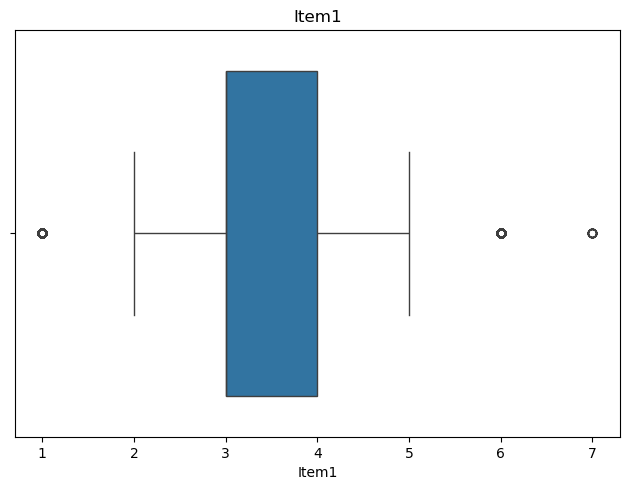

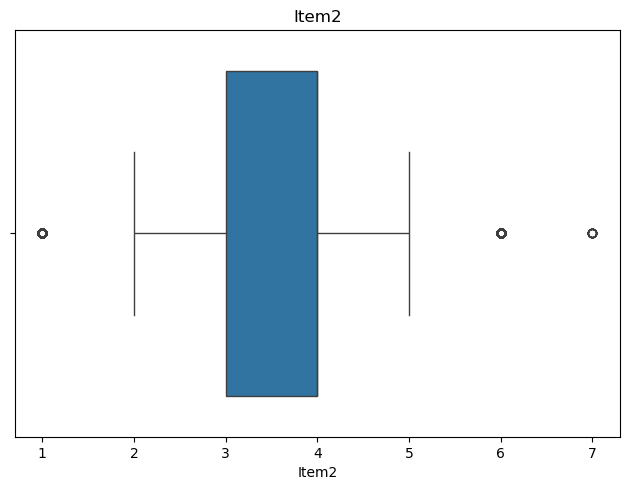

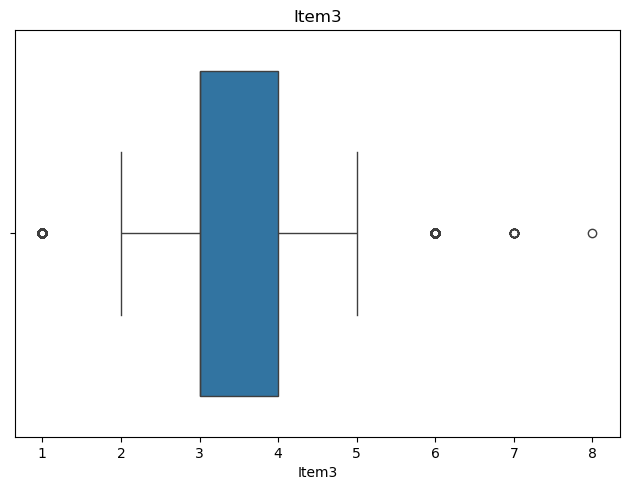

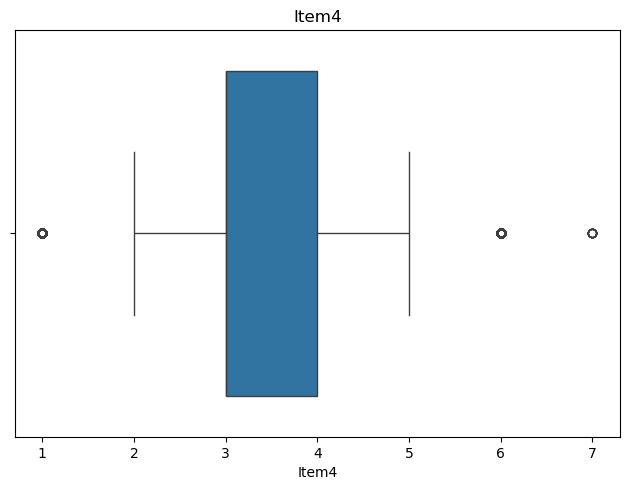

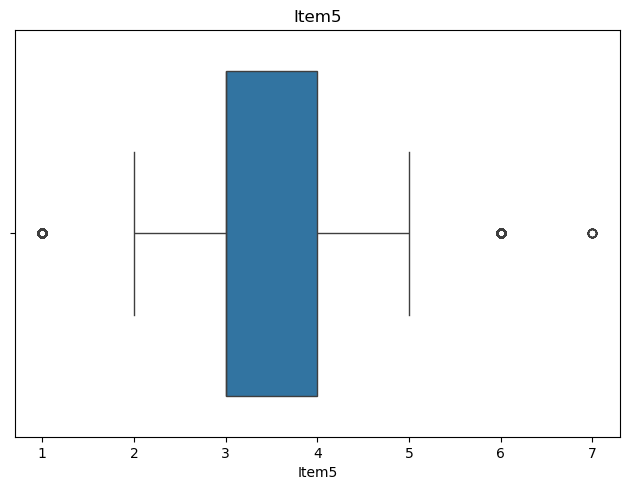

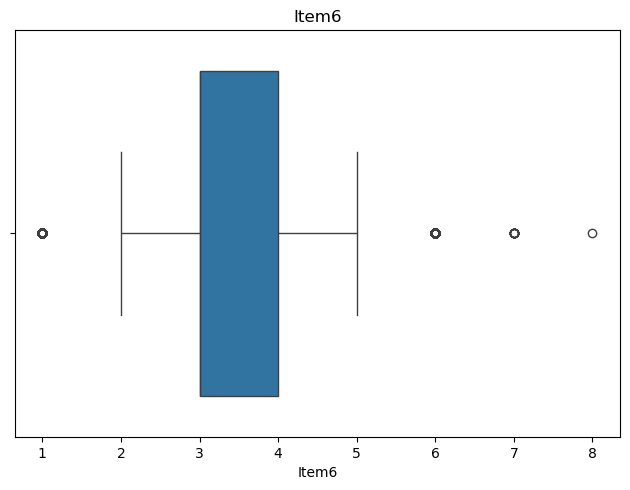

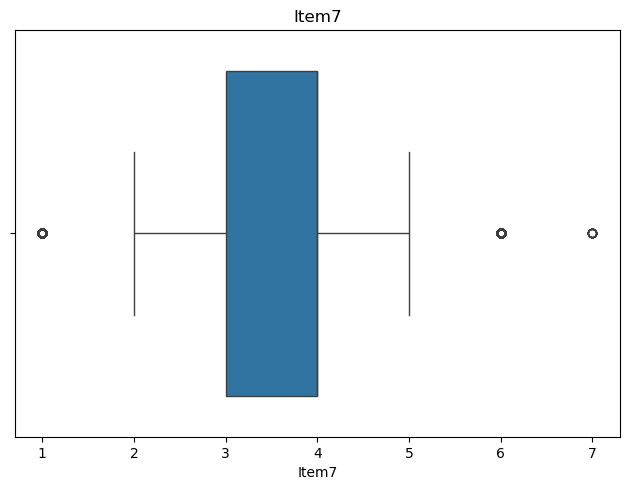

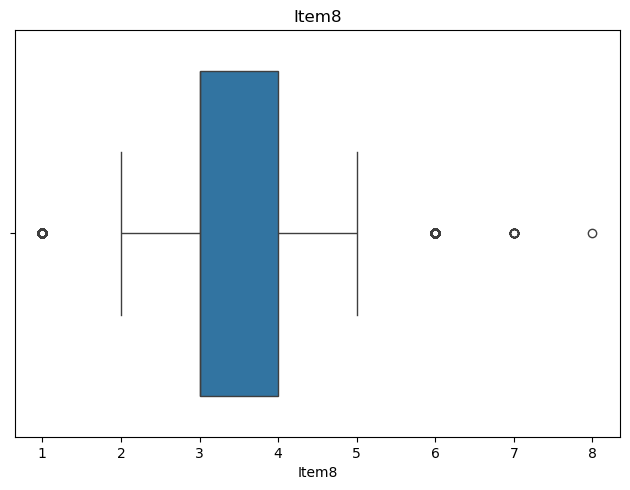

In [15]:
#assessing outliers using boxplots for all numeric variables. Outliers are acceptable as is,
#and will not require further cleaning.
for col in df: 
    if pd.api.types.is_numeric_dtype(df[col]):
        boxplot = sb.boxplot(x=df[col], data=df)
        plt.tight_layout()
        plt.title(col)
        plt.show()
    else: continue

#### __C2. Summary statistics__ <a name="summarystatistics"></a>
The cell below contains summary statistics on the numeric variables within the dataset. 
>The __count__ refers to the discrete number of observations within each column, which is a uniform 10,000 amongst all variables.

>__Mean__ refers to the average value amongst all observations in the column.

>The __standard deviation__ is a measure related to the mean, and represents the degree to which the observations in each column vary around the mean -- a smaller standard deviation means values are typically closer to the mean, and vice versa.

> __Minimum and maximum__ are the numerical least and greatest values amongst observations in the dataset.

>The __quantiles__ -- 25%, 50%, and 75% -- represent the values found when portioning the dataset into its bottom quarter, bottom half, and bottom three-quarters of data, respectively.

>The 50% percentile is also known as the __median__ of the dataset, representing the logical middle of the dataset.

It should be understood that the last 8 variables in this summary, item1 and so on, are considered categorical variables. Their numeric appearance describes categories rather than a measured amount or count.

In [17]:
newdata = df[['Tenure', 'Outage_sec_perweek', 'MonthlyCharge', 
              'Income', 'Yearly_equip_failure', 'Email', 'Age', 'Children',
              'Item5', 'Bandwidth_GB_Year', 'Contract', 'Techie', 'Area',
              'PaymentMethod', 'TechSupport', 'Port_modem']]
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Outage_sec_perweek    10000 non-null  float64
 2   MonthlyCharge         10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Yearly_equip_failure  10000 non-null  int64  
 5   Email                 10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Children              10000 non-null  int64  
 8   Item5                 10000 non-null  int64  
 9   Bandwidth_GB_Year     10000 non-null  float64
 10  Contract              10000 non-null  object 
 11  Techie                10000 non-null  object 
 12  Area                  10000 non-null  object 
 13  PaymentMethod         10000 non-null  object 
 14  TechSupport           10000 non-null  object 
 15  Port_modem          

In [18]:
#obtaining summary statistics on all variables.
newdata.describe()

,Tenure,Outage_sec_perweek,MonthlyCharge,Income,Yearly_equip_failure,Email,Age,Children,Item5,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,34.526188,10.001848,172.624816,39806.926771,0.398000,12.016000,53.078400,2.0877,3.492900,3392.341550
std,26.443063,2.976019,42.943094,28199.916702,0.635953,3.025898,20.698882,2.1472,1.024819,2185.294852
min,1.000259,0.099747,79.978860,348.670000,0.000000,1.000000,18.000000,0.0000,1.000000,155.506715
25%,7.917694,8.018214,139.979239,19224.717500,0.000000,10.000000,35.000000,0.0000,3.000000,1236.470827
50%,35.430507,10.018560,167.484700,33170.605000,0.000000,12.000000,53.000000,1.0000,3.000000,3279.536903
75%,61.479795,11.969485,200.734725,53246.170000,1.000000,14.000000,71.000000,3.0000,4.000000,5586.141370
max,71.999280,21.207230,290.160419,258900.700000,6.000000,23.000000,89.000000,10.0000,7.000000,7158.981530


In contrast to numerical variables, most categorical variables consist of the object datatype and thus must be summarized differently. Categorical variables are summarized in the cell below, according to each unique value within the variable alongside its percent frequency of occurrence.

In [20]:
#summarizing 
for col in newdata:
    if pd.api.types.is_object_dtype(newdata[col]):
        print(f'Variable: {col} (out of 10,000 observations)')
        print(newdata[col].value_counts(dropna=False, normalize=True)
              .mul(100).round(1).apply(lambda x: f"{x}%").to_string())
        print("\n")
    else: continue

Variable: Contract (out of 10,000 observations)
Contract
Month-to-month    54.6%
Two Year          24.4%
One year          21.0%


Variable: Techie (out of 10,000 observations)
Techie
No     83.2%
Yes    16.8%


Variable: Area (out of 10,000 observations)
Area
Suburban    33.5%
Urban       33.3%
Rural       33.3%


Variable: PaymentMethod (out of 10,000 observations)
PaymentMethod
Electronic Check            34.0%
Mailed Check                22.9%
Bank Transfer(automatic)    22.3%
Credit Card (automatic)     20.8%


Variable: TechSupport (out of 10,000 observations)
TechSupport
No     62.5%
Yes    37.5%


Variable: Port_modem (out of 10,000 observations)
Port_modem
No     51.7%
Yes    48.3%




#### __C3. Visualizations__ <a name="visualizations"></a>
Visualizations of the data to be used in the initial model are below. These graphs only include variables used for my initial logistic model. 

#### <u>Univariate visualizations</u>

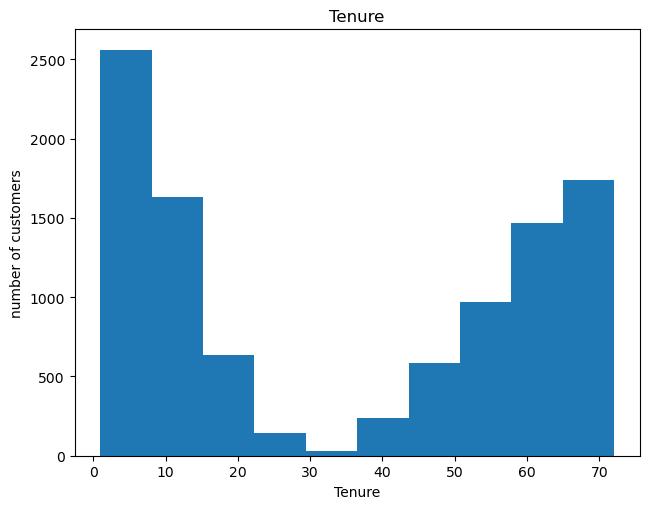

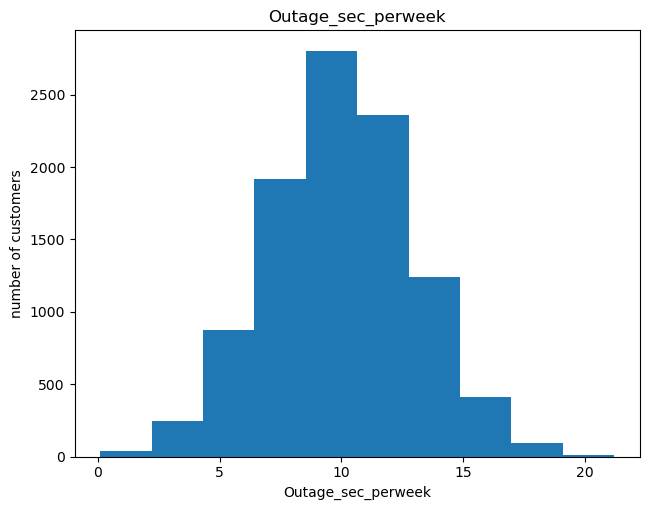

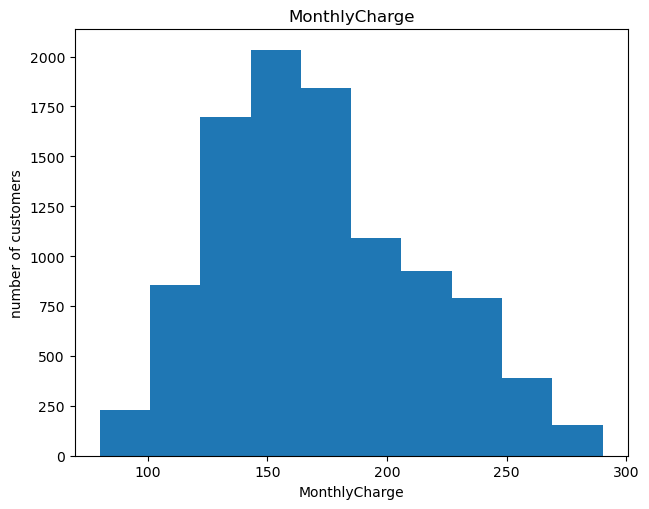

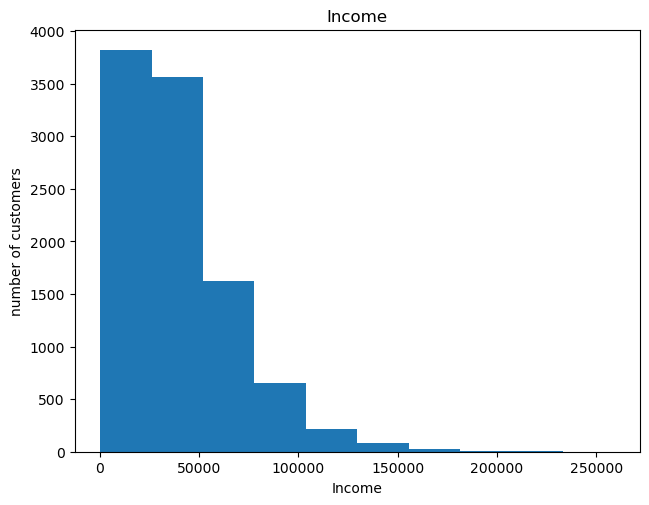

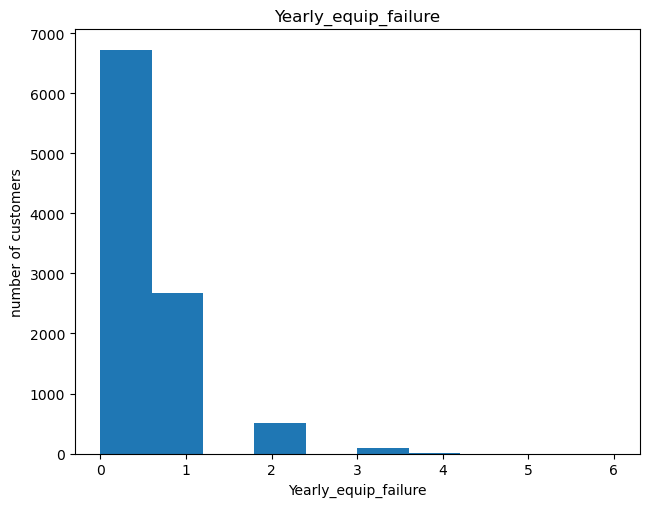

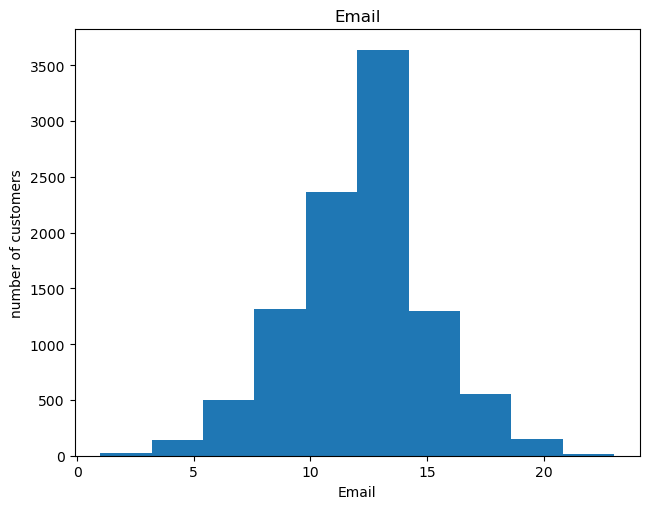

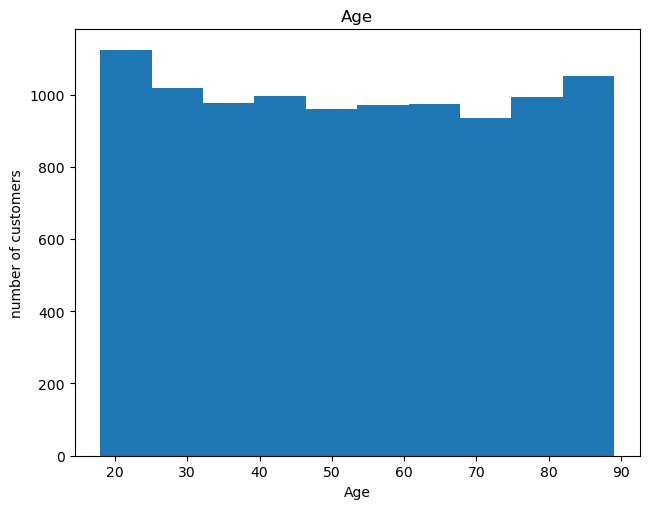

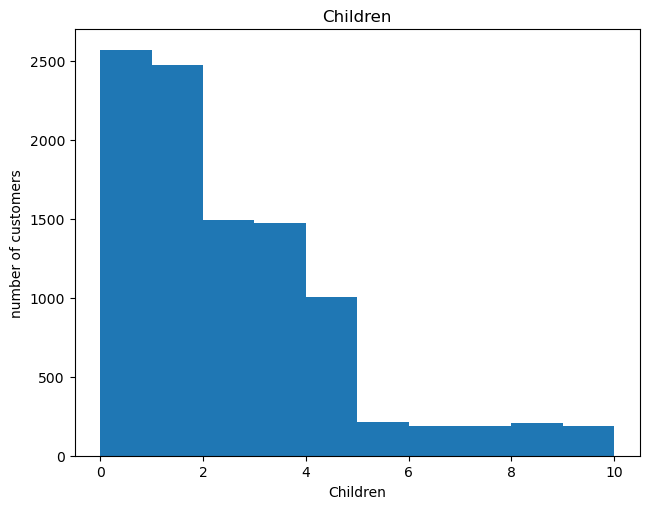

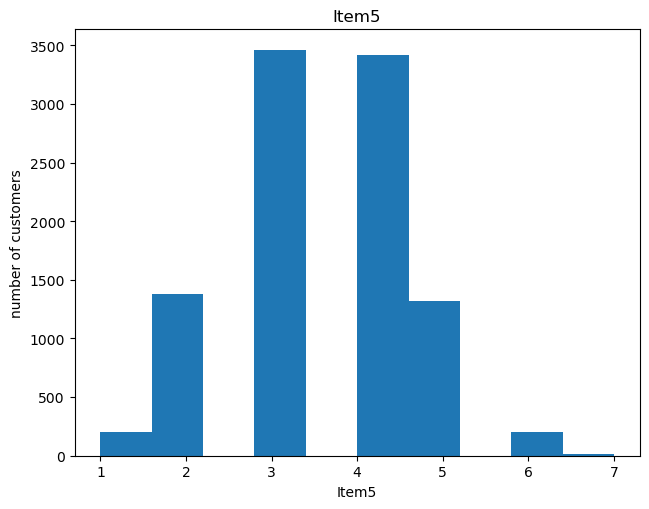

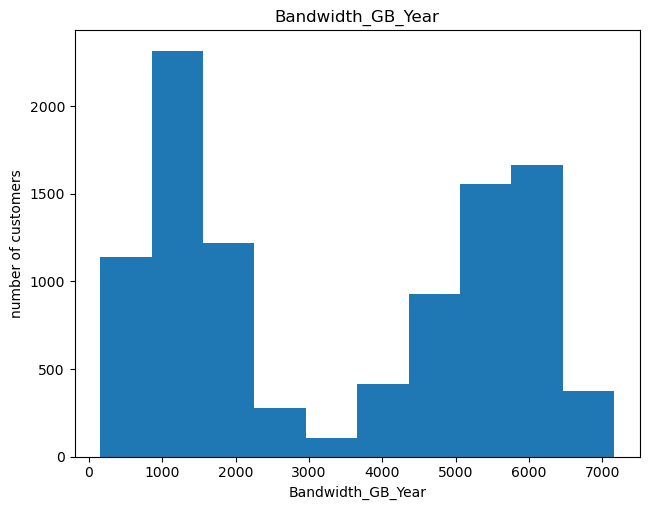

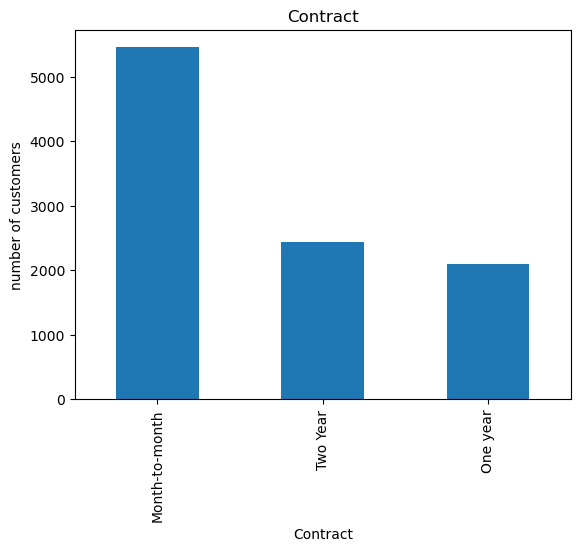

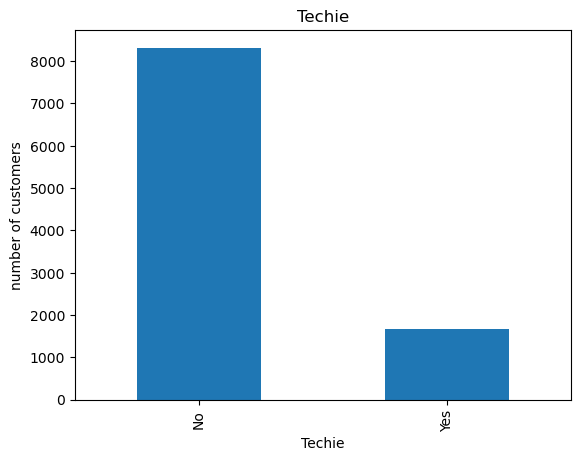

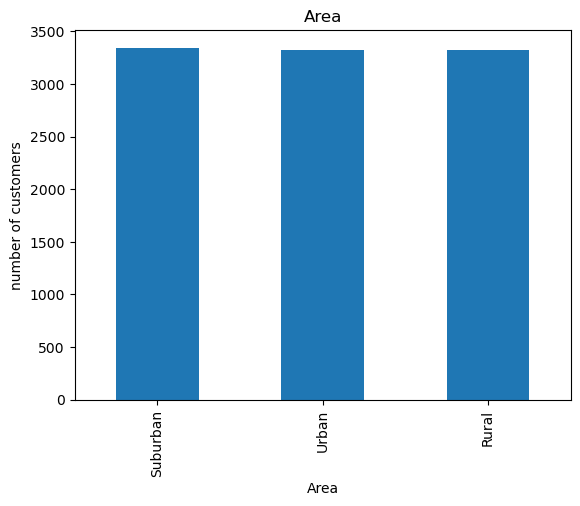

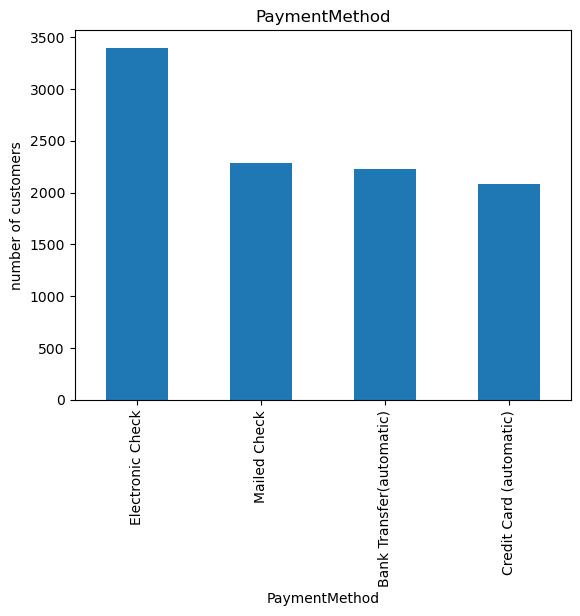

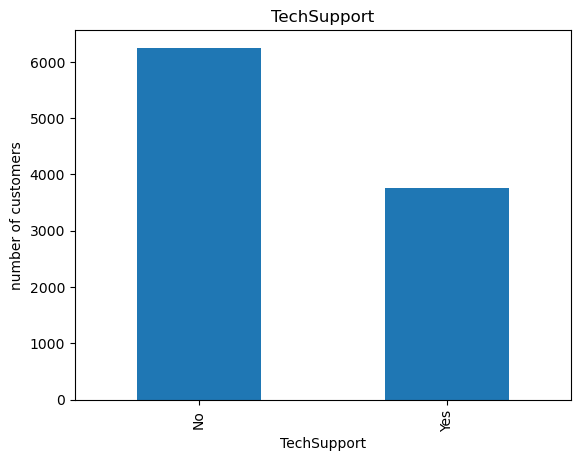

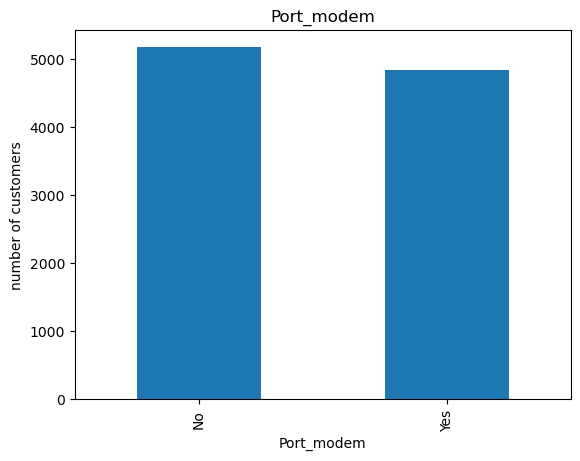

In [23]:
#histograms for explanatory variables
for col in newdata: 
    if pd.api.types.is_numeric_dtype(newdata[col]):
        plt.hist(newdata[col])
        plt.tight_layout()
        plt.ylabel('number of customers')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
    else: 
        newdata[col].value_counts(dropna=False).plot(kind='bar')
        newdata[[col]].value_counts(dropna=False)
        plt.ylabel('number of customers')
        plt.title(col)
        plt.show()

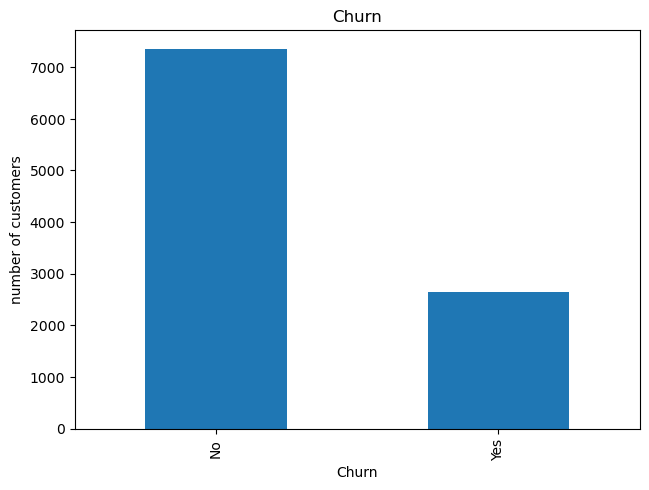

In [24]:
#histogram for response variable
df['Churn'].value_counts(dropna=False).plot(kind='bar')
df[['Churn']].value_counts(dropna=False)
plt.tight_layout()
plt.ylabel('number of customers')
plt.title('Churn')
plt.show()

#### <u>Bivariate visualizations</u>

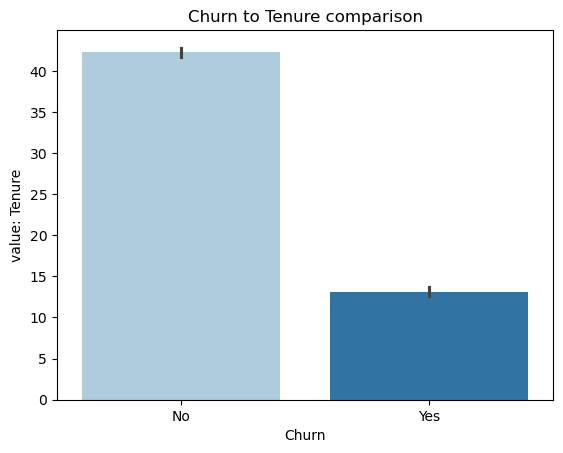

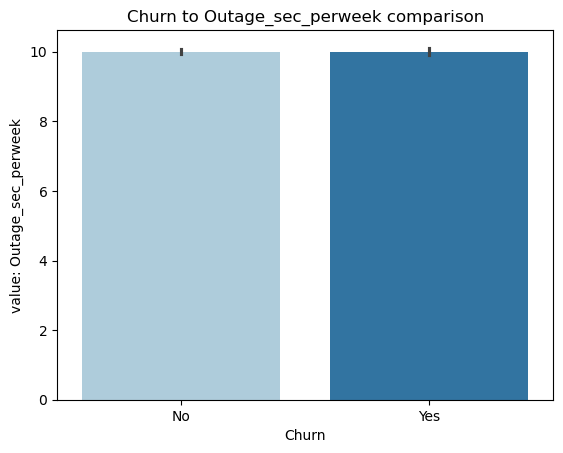

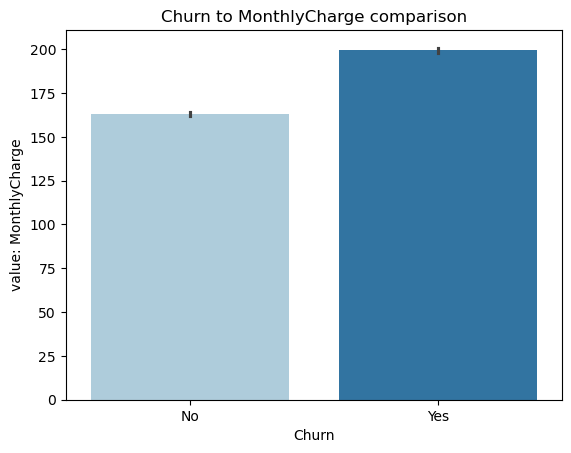

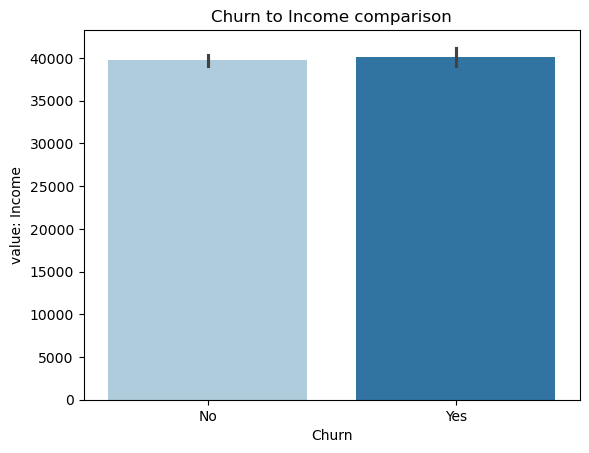

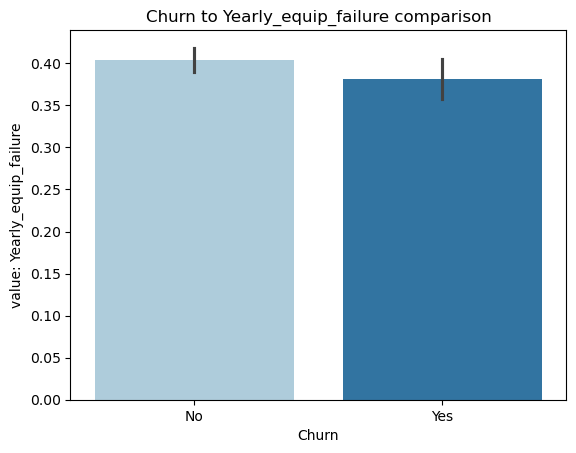

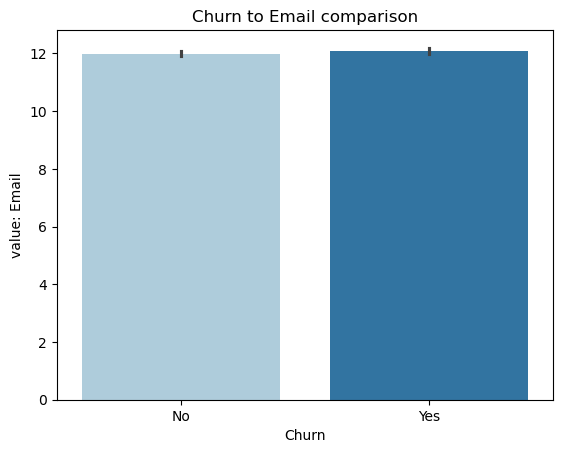

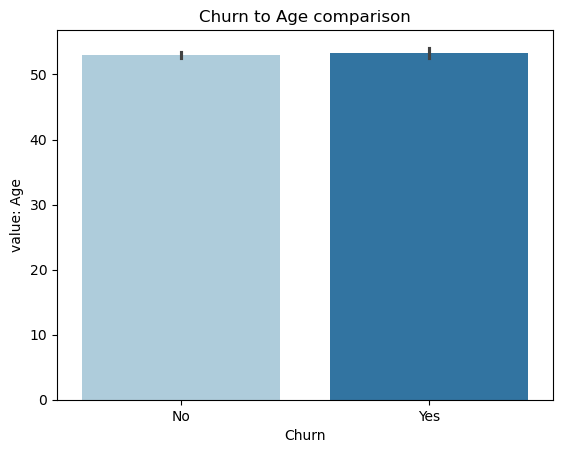

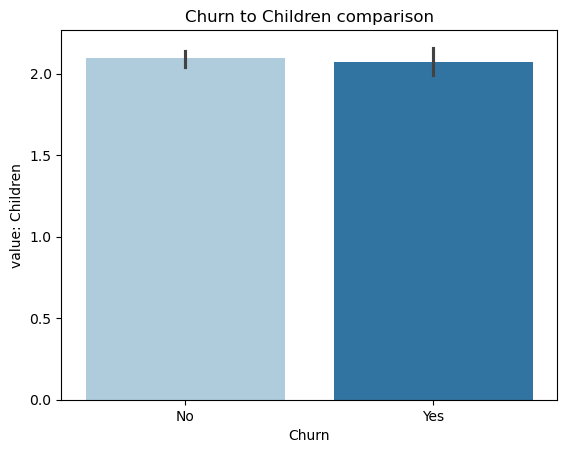

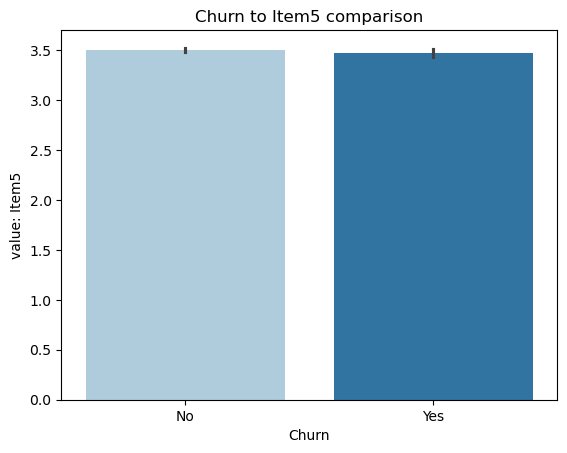

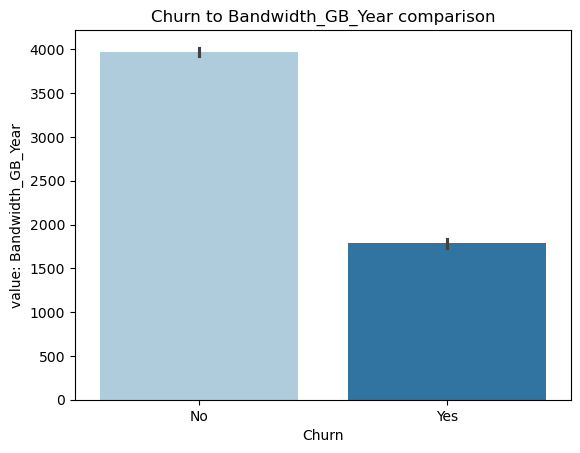

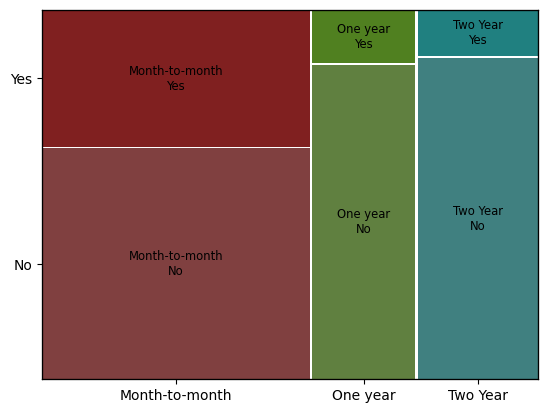

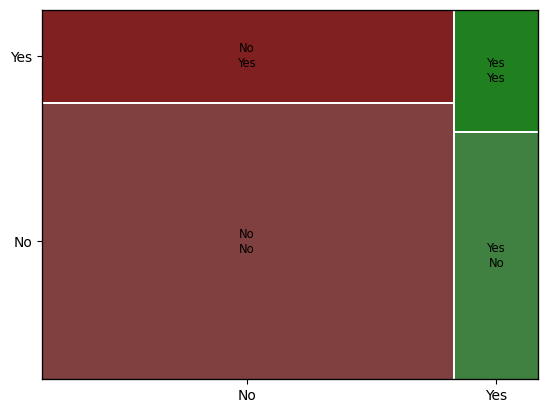

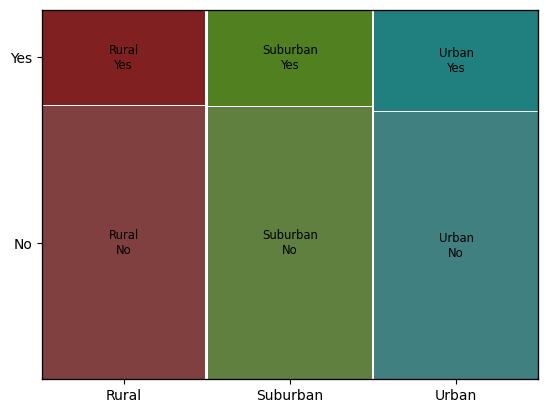

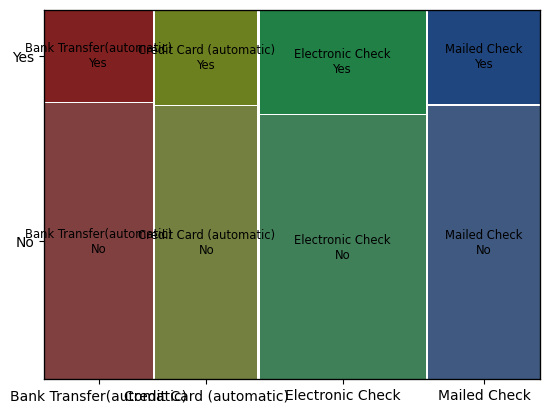

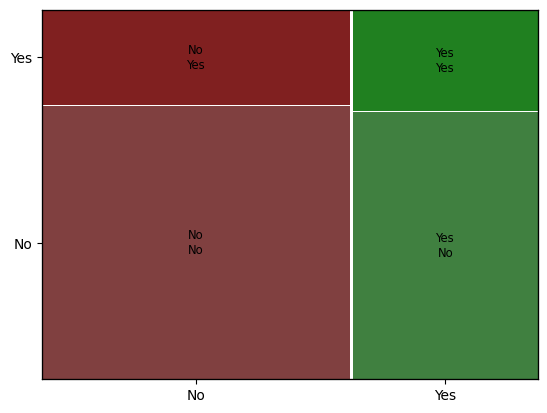

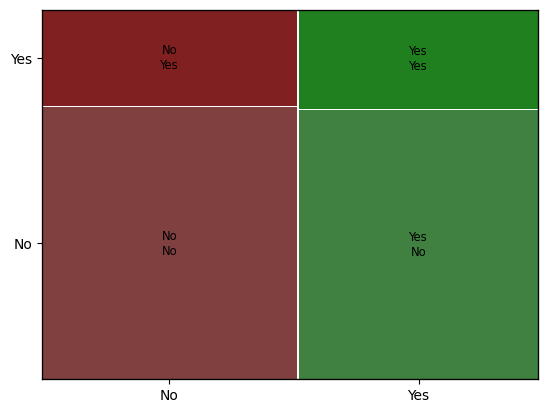

In [26]:
#bivariate visualizations (numerical v. categorical) via scatterplot
for col in newdata:
    if pd.api.types.is_numeric_dtype(newdata[col]):
        sb.barplot(x='Churn',
                   y= col,
                   data=df, 
                   hue='Churn', 
                   palette="Paired").set(ylabel=f'value: {col}')
        plt.title(f"Churn to {col} comparison")
        plt.show()
    else: 
        xtable = pd.crosstab(newdata[col], df['Churn'])
        mosaic(xtable.stack())
        plt.show()

#### __C4. Data Transformation (Data Wrangling)__ <a name="datatransformation"></a>
The necessary data transformation conducted for this dataset concerns the categorical Contract, Techie, Area, PaymentMethod,Techsupport, Port_modem, and Churn variables. 

In order to transform ordinal variables' object values into usable numeric values, I performed one-hot encoding, where a dummy variable is created for each unique value using Pandas <pd.getdummies()>. For example, the unique values in Contract are 'Month-to-month', 'One year', and 'Two Year'. The new dummy variables contain 0s and 1s, where 1 is a record of that value occurring for each record. After creating all dummy variables, I shift them into my dataset to be used in my model.

Binary categorical variables, such as Churn and Techie, are less complicated: I create a data dictionary to encode No values as 0, and Yes values as 1. Creating a new numerical variable within my original dataset to translate the values over leaves me with numerical columns that refer to the original categorical data.

In [28]:
#beginning encoding for a categorical explanatory variable in my MLR dataset
contract_encoded = pd.get_dummies(df['Contract'], dtype = int)
contract_encoded.head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [29]:
#transferring dummy variables into dataframe
df['Contract_monthly'] = contract_encoded['Month-to-month']
df['Contract_one'] = contract_encoded['One year']
df['Contract_two'] = contract_encoded['Two Year']
print(df['Contract_two'])
df['Contract_one'].value_counts()

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    1
9999    0
Name: Contract_two, Length: 10000, dtype: int32


Contract_one
0    7898
1    2102
Name: count, dtype: int64

In [30]:
df['Techie_numeric'] = df['Techie']
dict_techie = {"Techie_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_techie)
df["Techie_numeric"]= df["Techie_numeric"].astype(float)

In [31]:
area_encoded = pd.get_dummies(df['Area'], dtype = int)
area_encoded.head()

,Rural,Suburban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [32]:
df['Area_rural'] = area_encoded['Rural']
df['Area_suburban'] = area_encoded['Suburban']
df['Area_urban'] = area_encoded['Urban']
df['Area_urban'].head()

0    1
1    1
2    1
3    0
4    0
Name: Area_urban, dtype: int32

In [33]:
payment_encoded = pd.get_dummies(df['PaymentMethod'], dtype = int)
payment_encoded.head()

,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [34]:
df['Payment_transfer'] = payment_encoded['Bank Transfer(automatic)']
df['Payment_cc'] = payment_encoded['Credit Card (automatic)']
df['Payment_echeck'] = payment_encoded['Electronic Check']
df['Payment_mcheck'] = payment_encoded['Mailed Check']
df['Payment_mcheck'].head()

0    0
1    0
2    0
3    1
4    1
Name: Payment_mcheck, dtype: int32

In [35]:
df['TechSupport_numeric'] = df['TechSupport']
dict_techsupport = {"TechSupport_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_techsupport)
df["TechSupport_numeric"]= df["TechSupport_numeric"].astype(float)

In [36]:
df['Port_modem_numeric'] = df['Port_modem']
dict_portmodem = {"Port_modem_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_portmodem)
df["Port_modem_numeric"]= df["Port_modem_numeric"].astype(float)

In [37]:
df['Churn_numeric'] = df['Churn']
dict_churn = {"Churn_numeric": {"No": 0, "Yes": 1}}
df = df.replace(dict_churn)
df["Churn_numeric"]= df["Churn_numeric"].astype(float)

#### __C5. Prepared data set__ <a name="prepareddataset"></a>
Testdata is a dataframe to house potential variables in good fit for the model. They will be analysed with a primary component analysis to identify broad strokes of relationships amongst the features. Variables with a significant degree of correlation to each other will produce collinearity in a model and thus must be removed to preserve accuracy.

In [39]:
#creating tentative first dataset
testdata = df[['Tenure', 'Outage_sec_perweek', 'MonthlyCharge', 
               'Income', 'Yearly_equip_failure', 'Email', 'Age', 'Children', 
               'Item5', 'Bandwidth_GB_Year', 'Contract_monthly', 'Contract_one', 
               'Techie_numeric', 'Area_rural','Area_suburban','Payment_transfer', 
               'Payment_cc', 'Payment_echeck', 'TechSupport_numeric', 
               'Port_modem_numeric' ]]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Outage_sec_perweek    10000 non-null  float64
 2   MonthlyCharge         10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Yearly_equip_failure  10000 non-null  int64  
 5   Email                 10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Children              10000 non-null  int64  
 8   Item5                 10000 non-null  int64  
 9   Bandwidth_GB_Year     10000 non-null  float64
 10  Contract_monthly      10000 non-null  int32  
 11  Contract_one          10000 non-null  int32  
 12  Techie_numeric        10000 non-null  float64
 13  Area_rural            10000 non-null  int32  
 14  Area_suburban         10000 non-null  int32  
 15  Payment_transfer    

In [40]:
#normalizing data to be able to compare their .corr measures
testdata_normalized = (testdata-testdata.mean())/testdata.std()

#### Variance Inflation Factor (VIF) <a name="vif"></a>
VIF is a measure of multicollinearity amongst a dataset. I am performing the calculations of VIF for each explanatory variable, to prevent multicollinearity in the initial run of the model. I am looking for VIF values to be at or less than 10.0, where values less than 3.0 are ideal and values larger than 10.0 will be removed from the dataset entirely (Bobbitt, 2022).

Below are the results from finding the variance inflation factors for each explanatory variable.

In [42]:
vif_testdata = pd.DataFrame()
vif_testdata['variable'] = testdata.columns

vif_testdata['VIF'] = [variance_inflation_factor(testdata.values, i) for i in range(testdata.shape[1])]

print(vif_testdata)

                variable         VIF
0                 Tenure  247.258383
1     Outage_sec_perweek   10.570904
2          MonthlyCharge   21.180730
3                 Income    2.913430
4   Yearly_equip_failure    1.387687
5                  Email   13.322630
6                    Age    7.580087
7               Children    2.092479
8                  Item5   10.669617
9      Bandwidth_GB_Year  312.603555
10      Contract_monthly    3.099058
11          Contract_one    1.808991
12        Techie_numeric    1.199281
13            Area_rural    1.960449
14         Area_suburban    1.963614
15      Payment_transfer    1.922016
16            Payment_cc    1.870147
17        Payment_echeck    2.405104
18   TechSupport_numeric    1.630039
19    Port_modem_numeric    1.918810


After running VIF, I found Tenure, MonthlyCharge, and Bandwidth_GB_Year to have outstanding large values. I removed the variable with the largest VIF, and kept re-measuring the values until I was left with all variables with VIF under 10.0. In the process, I noticed Tenure's value dropped dramatically after the removal of Bandwidth_GB_Year, remaining in the final dataset, which is initialized below. This dataset is now prepped to remove great amounts of multicollinearity, leaving me able to focus on producing an accurate model via other metrics.

In [44]:
#re-initializing testdata without the erroneous variables
testdata = testdata.drop(['Bandwidth_GB_Year', 'Email', 'MonthlyCharge'], axis=1)

In [45]:
#demonstrating that the VIF values are now acceptable across all 17 variables
vif_testdata2 = pd.DataFrame()
vif_testdata2['variable'] = testdata.columns

vif_testdata2['VIF'] = [variance_inflation_factor(testdata.values, i) for i in range(testdata.shape[1])]

print(vif_testdata2)

                variable       VIF
0                 Tenure  2.627776
1     Outage_sec_perweek  9.192014
2                 Income  2.863865
3   Yearly_equip_failure  1.386092
4                    Age  6.506284
5               Children  1.903443
6                  Item5  9.402338
7       Contract_monthly  3.010865
8           Contract_one  1.773545
9         Techie_numeric  1.197108
10            Area_rural  1.931497
11         Area_suburban  1.936512
12      Payment_transfer  1.886443
13            Payment_cc  1.832427
14        Payment_echeck  2.355459
15   TechSupport_numeric  1.580069
16    Port_modem_numeric  1.901086


In [50]:
#adding Y
testdata = df[['Tenure', 'Outage_sec_perweek', 'MonthlyCharge', 
               'Income', 'Yearly_equip_failure', 'Email', 'Age', 'Children', 
               'Item5', 'Bandwidth_GB_Year', 'Contract_monthly', 'Contract_one', 
               'Techie_numeric', 'Area_rural','Area_suburban','Payment_transfer', 
               'Payment_cc', 'Payment_echeck', 'TechSupport_numeric', 
               'Port_modem_numeric', 'Churn']]
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tenure                10000 non-null  float64
 1   Outage_sec_perweek    10000 non-null  float64
 2   MonthlyCharge         10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Yearly_equip_failure  10000 non-null  int64  
 5   Email                 10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Children              10000 non-null  int64  
 8   Item5                 10000 non-null  int64  
 9   Bandwidth_GB_Year     10000 non-null  float64
 10  Contract_monthly      10000 non-null  int32  
 11  Contract_one          10000 non-null  int32  
 12  Techie_numeric        10000 non-null  float64
 13  Area_rural            10000 non-null  int32  
 14  Area_suburban         10000 non-null  int32  
 15  Payment_transfer    

In [52]:
testdata.to_csv('C://Users/Aaminah/Desktop/masters/D208/testdata_pt2.csv', index=False)

#### __D1. Initial model__ <a name="initialmodel"></a>
Below is the initial model construction using the testdata variables against the response variable, Churn_numeric. The model returns an R-squared value of .3217, suggesting the model has lots of room for refinement. 

In [55]:
testdata = testdata.drop(['Churn'], axis=1)

In [57]:
#creating our basic, initial model using testdata. accuracy = 81.64%
y = df['Churn_numeric']
X = testdata
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.233318
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5965
Time:                        22:59:32   Log-Likelihood:                -2333.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4557      0.016    -27.782      0.000      -0.488      -0.424

In [58]:
predictions = model.pred_table()
print(f'{predictions}, where the accuracy is {(predictions[1][1]+predictions[0][0])/100}%')

[[6891.  459.]
 [ 576. 2074.]], where the accuracy is 89.65%


#### __D2. Justification of model reduction__ <a name="justification"></a>
To reduce the model, I perform feature selection via backwards stepwise elimination, focusing on features' p-values. After dropping the variable with the largest p-value and rerunning the model, I moved on to the next largest p-value, repeating this process until all p-values were less than or equal to .05. Throughout this process, I will note model accuracy metrics and log changes, ensuring that each explanatory variable contributes significantly to the response variable. This process is demonstrated below. The accuracy calculated for each model is in comments.

In [60]:
#81.64%
y = df['Churn_numeric']
X = testdata.drop(['Item5'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.233322
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5965
Time:                        22:59:32   Log-Likelihood:                -2333.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4557      0.016    -27.783      0.000      -0.488      -0.424

In [61]:
#81.65%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.233322
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5965
Time:                        22:59:32   Log-Likelihood:                -2333.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4557      0.016    -27.784      0.000      -0.488      -0.424

In [62]:
#81.63%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235408
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5929
Time:                        22:59:32   Log-Likelihood:                -2354.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4277      0.016    -27.490      0.000      -0.458      -0.397

In [63]:
#81.67%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235410
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5929
Time:                        22:59:32   Log-Likelihood:                -2354.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4277      0.016    -27.490      0.000      -0.458      -0.397

In [64]:
#81.64%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235411
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5929
Time:                        22:59:32   Log-Likelihood:                -2354.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4278      0.016    -27.498      0.000      -0.458      -0.397

In [65]:
#81.62%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235426
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5928
Time:                        22:59:32   Log-Likelihood:                -2354.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4279      0.016    -27.505      0.000      -0.458      -0.397

In [66]:
#81.57%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235456
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5928
Time:                        22:59:32   Log-Likelihood:                -2354.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Tenure                  -0.4278      0.016    -27.504      0.000      -0.458      -0.397

In [67]:
#81.62%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.235465
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5928
Time:                        22:59:32   Log-Likelihood:                -2354.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.4279      0.016    -27.508      0.000      -0.458      -0.397
Mo

In [68]:
#81.62%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238177
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5881
Time:                        22:59:32   Log-Likelihood:                -2381.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.3975      0.015    -26.991      0.000      -0.426      -0.369
Mo

In [69]:
#81.62%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age', 'Contract_one'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238210
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5880
Time:                        22:59:33   Log-Likelihood:                -2382.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.3974      0.015    -26.988      0.000      -0.426      -0.369
Mo

In [70]:
#81.64%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age', 'Contract_one', 'Payment_transfer'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238408
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5877
Time:                        22:59:33   Log-Likelihood:                -2384.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.3969      0.015    -26.972      0.000      -0.426      -0.368
Mo

In [71]:
#81.62%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age', 'Contract_one', 'Payment_transfer', 'Port_modem_numeric'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238572
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5874
Time:                        22:59:33   Log-Likelihood:                -2385.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Tenure                 -0.3965      0.015    -26.972      0.000      -0.425      -0.368
Mo

In [72]:
#81.7%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age', 'Contract_one', 'Payment_transfer', 'Port_modem_numeric', 
                   'TechSupport_numeric'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238979
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5867
Time:                        22:59:33   Log-Likelihood:                -2389.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Tenure               -0.3978      0.015    -27.072      0.000      -0.427      -0.369
MonthlyC

In [73]:
predictions2 = model.pred_table()
print(f'{predictions2}, where the accuracy is {(predictions2[1][1]+predictions2[0][0])/100}%')

[[6884.  466.]
 [ 575. 2075.]], where the accuracy is 89.59%


#### __D3. Reduced logistic regression model__ <a name="reducedmodel"></a>
Below is the final reduced model after feature selection: no issues with multicollinearity, all features have p-values of 0.000, and accuracy (according to the confusion matrix) is greatest amongst all models, at 81.7%.

In [75]:
#81.7%
y = df['Churn_numeric']
X = testdata.drop(['Item5', 'Payment_cc', 'Children', 'Outage_sec_perweek', 
                   'Income', 'Area_rural', 'Area_suburban', 'Yearly_equip_failure', 
                   'Age', 'Contract_one', 'Payment_transfer', 'Port_modem_numeric', 
                   'TechSupport_numeric'], axis=1)
model = sm.Logit(y, X.assign(const=1)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.238979
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.5867
Time:                        22:59:33   Log-Likelihood:                -2389.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Tenure               -0.3978      0.015    -27.072      0.000      -0.427      -0.369
MonthlyC

#### __E1. Model comparison__ <a name="modelcomparison"></a>
My initial model returned with a LLR p-value of 0.0, psuedo R-squared of .3217, and accuracy of 81.64%. The p-value indicates that my model is somewhat significant, reflected by how 81.64% of its predictions were correct (Middleton, 2024). 

The final model returned a LLR p-value of 0.0, pseudo R-squared of .3204, and accuracy of 81.7%. I can account for the R-squared deprecation as a result of drastically decreasing the number of features in the model. This is a worthy tradeoff, seeing as my model became more accurate by 0.06%.

#### __E2. Output and calculations__ <a name="output"></a>

The __confusion matrix__ is a good tool to assess the accuracy of the model. I want to refine the model's accuracy as much as possible. 6497 represents the total count of true negatives, 1673 represents the total count of true positives, 853 the count of false positives, and 977 the count of false negatives in the model's predictions. 

The accuracy measure is surmised as the total correct predictions divided by the total number of predictions/records, which is 81.7% for the reduced model. This is a general indication of the model's ability to make correct predictions, which is an improvement over the initial model's 81.64% accuracy.

In [78]:
predictions2 = model.pred_table()
print(f'{predictions2}, where the accuracy is {(predictions2[1][1]+predictions2[0][0])/100}%')

[[6884.  466.]
 [ 575. 2075.]], where the accuracy is 89.59%


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.7313432835820897, 0.933487016068886),
  ('0', '1'): (0.0,
   0.9368092752050986,
   0.7313432835820897,
   0.06319072479490129),
  ('1', '0'): (0.7363184079601991,
   0.0,
   0.263681592039801,
   0.21626026452704825),
  ('1', '1'): (0.7363184079601991,
   0.21958252366326086,
   0.263681592039801,
   0.7804174763367392)})

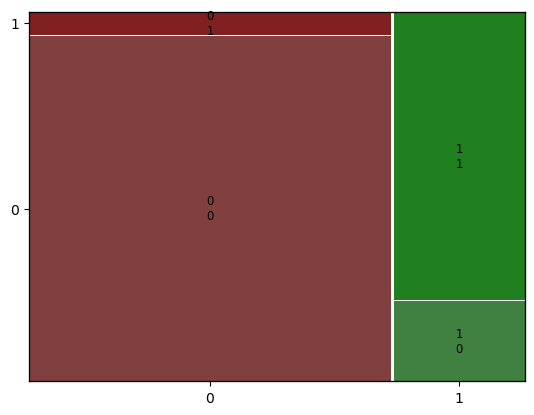

In [79]:
mosaic(predictions2)

## __E3. Code__ <a name="endcode"></a>
Code and documentation provided within 'D208 PA pt1 Aaminah Halipoto.ipynb'

#### __F1. Results__ <a name="results"></a>
__A. Regression equation__ </br>
The regression equation gleaned from the reduced model is as follows: 
>ln(p-hat(Churn)/1 - p-hat(Churn)) = -0.7142 -0.0612(Tenure) +1.7580(Contract_monthly) +0.5455(Techie) +0.2075(Payment_echeck)

__B. Coefficients in the regression equation__ </br>
This equation is useful for understanding the nature of the Churn variable, and how 4 other variables affect the probability of churn occurring. _The below interpretations are assuming that all other variables are held constant._ </br>
At a glance, I understand that the log-odds of churn (Y) decreases by 0.7142 when all explanatory variables are at zero; as is the practical understanding of the y-intercept. </br>
Customer tenure increases 1 unit for every 0.0612 decrease in log odds of Y. 

For categorical variables, interpretation is slightly different (Grace-Martin, 2023).  When any categorical variable is at 0 (rather than 1), the log odds of Y are unchanged. Additionally, we can understand the log odds of churn as :
* _increasing_ by 1.7580  if the customer has a monthly contract ('Contract_monthly' = 1) as opposed to a different contract ('Contract_monthly' = 0),
* _increasing_ by 0.5455 if the customer considers themself a techie ('Techie_numeric' = 1) as opposed to not ('Techie_numeric' = 0), and
* * _increasing_ by 0.2075 if the customer uses e-checks ('Payment_echeck' = 1) as opposed to other payment methods ('Payment_echeck' = 0).


__C. Statistical and practical significance__ </br>
The end model has a LLR p-value of 0.000, meaning that overall, the model is better at predicting for each feature than a model without any features. Issues arise when looking at the log likelihood decreasing by 7.2, indicating that the final model (again, despite removing many variables) may be less of a good fit for the data than the initial model. In general, I point to the accuracy increasing by 0.6% to 81.7% to be a positive indication of this model's statistical significance.

The model also contains practical significance. From the intercept, we can understand that churn is actually decreasing as all variables remain at 0 -- this is not as significant due to customer tenure, which is always increasing until a customer churns, but is still possible considering the other categorical variables. It is extremely possible for customers to be in a position where all other variables are held at 0 -- customers not being 'techies', not using e-checks, AND having yearly/biyearly contracts-- where the implications on Y given by the regression equation become useful in real life.

__D. Limitations of Analysis__ </br>
The reduced model has significance according to the LLR p-value of 0.00, but it still has room for improvement. Around 20% of predictions are inaccurate, which may be due to outliers present in data, or some degree of multicollinearity still present amongst the features. It is also possible that if I focused on a metric such as BIC to narrow down the model, I would have removed different features to create an even more accurate model.

#### __F2. Recommendations__ <a name="recommendations"></a>
The final regression model proffers four explanatory variables as correlated to the occurrence of churn within customers, with 81.7% accuracy in predictions. Given our known errors and limitations within the dataset, it is safe to say that we can still glean insights from this model. </br>

As a business, it's imperative to understand how to retain customers in any approach. While we can see that churn is less likely as customers are newer (Tenure), we can suggest to give greater incentives to new customers. It seems that customers with shorter contracts are also less likely than customers without to churn, indicating that there is room for exploiting dynamic contract models to entice customers. Customers experienced with technology and e-payments are also likelier candidates for churn, suggesting that we should find new ways to optimize their service experiences in hopes of retaining their patronage. </br>

The above suggestions are only the most basic assumptions we can take away from the model, given that we understand correlation to be unrelated to actual cause-and effect; however, even if all the model's indications were inaccurate, we can still learn much from the variable relationships it shed light on.

#### __G. Panopto Demonstration__ <a name="panoptolink"></a>
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6e86adf6-d093-4cae-ac96-b1f001293b6d

#### __H. Sources of Third-Party Code__ <a name="codesources"></a>
 
Bobbitt, Zack. (2022, October 12). How to test for multicollinearity in python. Statology. https://www.statology.org/multicollinearity-in-python/ https://www.statology.org/multicollinearity-in-python/

Keith, M. (n.d.). Python: MLR, OLS, standardization, normalization. YouTube. https://youtu.be/QH_elD_JKuc?si=pLDfsXqs1c2FtEai 

Middleton, Keiona. (n.d.) D208 - Webinar: Getting Started with D208 Part II (November). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=39bbe2db-de7d-4bf5-913b-af5c0003da9d

Sewell, W. (n.d.). D207 Exploratory data analysis webinar: episode 3. Panopto. 
	https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=58f509ac-47df-4544-9f0a-	
	aeb5016ab8f7

#### __I. Web Sources__ <a name="sources"></a> </br>
##### __References__ </br> 
Kumar, S. (2023, November 14). 4. assumptions and limitations of logistic regression: Navigating the nuances. Medium. 
>https://medium.com/@skme20417/4-assumptions-and-limitations-of-logistic-regression-navigating-the-nuances-8ef249cc7a01   </br>

Grace-Martin, K. (2023, June 19). Interpreting regression coefficients. The Analysis Factor.
>https://www.theanalysisfactor.com/interpreting-regression-coefficients/</br>

R or python. Western Governors University. (2023, July 7). 
>https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html